In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

# Metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, RocCurveDisplay

# Pre-Processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

#

In [2]:
# Read in the raw data
df = pd.read_csv("./Resources/Chronic_Kidney_Dsease_data.csv")
print(df.shape)
df.head()

(1659, 54)


,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis,DoctorInCharge
0,1,71,0,0,0,2,31.069414,1,5.128112,1.676220,0.240386,4.076434,0,0,0,0,0,113,83,72.510788,9.212397,4.962531,25.605949,45.703204,0.744980,123.849426,137.652501,3.626058,10.314420,3.152648,16.114679,207.728670,85.863656,21.967957,212.095215,0,0,4.563139,1,0,0,3.563894,6.992244,4.518513,7.556302,76.076800,0,0,1,1.018824,4.966808,9.871449,1,Confidential
1,2,34,0,0,1,3,29.692119,1,18.609552,8.377574,6.503233,7.652813,1,1,0,0,0,120,67,100.848875,4.604989,3.156799,31.338166,55.784504,3.052317,88.539095,138.141335,5.332871,9.604196,2.855443,15.349205,189.450727,86.378670,87.569756,255.451314,0,0,9.097002,0,0,0,5.327336,0.356290,2.202222,6.836766,40.128498,0,0,0,3.923538,8.189275,7.161765,1,Confidential
2,3,80,1,1,0,1,37.394822,1,11.882429,9.607401,2.104828,4.392786,0,0,0,0,0,147,106,160.989441,5.432599,3.698236,39.738169,67.559032,1.157839,21.170892,142.970116,4.330891,9.885786,4.353513,13.018834,284.137622,132.269872,20.049798,251.902583,0,1,3.851249,1,0,0,4.855420,4.674069,5.967271,2.144722,92.872842,0,1,1,1.429906,7.624028,7.354632,1,Confidential
3,4,40,0,2,0,1,31.329680,0,16.020165,0.408871,6.964422,6.282274,0,0,0,0,0,117,65,188.506620,4.144466,2.868468,21.980958,33.202542,3.745871,123.779699,137.106913,3.810741,9.995894,4.016134,15.056339,235.112124,93.443669,58.260291,392.338425,0,0,7.881765,0,0,0,8.531685,5.691455,2.176387,7.077188,90.080321,0,0,0,3.226416,3.282688,6.629587,1,Confidential
4,5,43,0,1,1,2,23.726311,0,7.944146,0.780319,3.097796,4.021639,0,0,0,0,0,98,66,82.156699,4.262979,3.964877,12.216366,56.319082,2.570993,184.852046,140.627812,4.866765,8.907622,3.947907,16.690561,258.277566,171.758356,21.583213,370.523877,1,1,4.179459,1,0,0,1.422320,2.273459,6.800993,3.553118,5.258372,0,0,1,0.285466,3.849498,1.437385,1,Confidential


In [3]:
# Check for nulls and DataTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1659 entries, 0 to 1658
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PatientID                      1659 non-null   int64  
 1   Age                            1659 non-null   int64  
 2   Gender                         1659 non-null   int64  
 3   Ethnicity                      1659 non-null   int64  
 4   SocioeconomicStatus            1659 non-null   int64  
 5   EducationLevel                 1659 non-null   int64  
 6   BMI                            1659 non-null   float64
 7   Smoking                        1659 non-null   int64  
 8   AlcoholConsumption             1659 non-null   float64
 9   PhysicalActivity               1659 non-null   float64
 10  DietQuality                    1659 non-null   float64
 11  SleepQuality                   1659 non-null   float64
 12  FamilyHistoryKidneyDisease     1659 non-null   i

In [4]:
# No null data
# Data Types look good :)

df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [5]:
# Check for scaling
df.describe()

,PatientID,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Diagnosis
count,1659.000000,1659.000000,1659.000000,1659.00000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000
mean,830.000000,54.441230,0.515371,0.71308,0.977697,1.693189,27.620049,0.292948,9.969831,5.024247,5.028544,6.942324,0.141049,0.301386,0.257384,0.105485,0.210368,134.392405,89.313442,132.529429,6.983682,2.753198,27.578147,66.829202,2.493736,149.881615,139.968984,4.505336,9.489156,3.505543,13.927304,224.251158,125.044597,60.746861,224.804603,0.295359,0.318264,5.011715,0.380952,0.202532,0.201929,5.016697,3.482121,3.525510,5.054869,49.730659,0.044002,0.103074,0.197107,2.000336,4.947788,5.144973,0.918626
std,479.056364,20.549757,0.499914,1.00043,0.776686,0.910611,7.288670,0.455252,5.798787,2.866274,2.865777,1.704159,0.348177,0.458998,0.437325,0.307270,0.407693,25.767794,17.354479,36.563035,1.734714,1.317168,12.808062,30.050836,1.449695,86.850287,2.905595,0.583963,0.574849,0.576634,2.338372,43.666586,42.645021,23.170415,100.321757,0.456341,0.465943,2.869813,0.485767,0.402007,0.401560,2.896311,1.986292,2.026131,2.880460,27.827593,0.205162,0.304147,0.397934,1.141635,2.869959,2.901138,0.273492
min,1.000000,20.000000,0.000000,0.00000,0.000000,0.000000,15.033888,0.000000,0.021740,0.001186,0.002407,4.001053,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,70.044768,4.000405,0.501799,5.000249,15.107850,0.000900,0.178427,135.006489,3.503408,8.500033,2.503727,10.004223,150.015707,50.074597,20.030993,50.267668,0.000000,0.000000,0.000469,0.000000,0.000000,0.000000,0.015194,0.005171,0.006327,0.013697,0.087256,0.000000,0.000000,0.000000,0.001082,0.005392,0.004436,0.000000
25%,415.500000,36.000000,0.000000,0.00000,0.000000,1.000000,21.471449,0.000000,5.051156,2.555038,2.558443,5.487083,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,75.000000,100.504503,5.494988,1.583255,16.398275,41.149324,1.226335,76.784343,137.483563,3.993559,9.004488,2.984834,11.839478,186.440971,87.660348,41.252078,140.235507,0.000000,0.000000,2.619890,0.000000,0.000000,0.000000,2.464695,1.750661,1.820793,2.532867,26.991708,0.000000,0.000000,0.000000,1.005802,2.498119,2.569561,1.000000
50%,830.000000,54.000000,1.000000,0.00000,1.000000,2.000000,27.652077,0.000000,9.951503,5.072395,4.989810,6.933255,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,89.000000,131.478423,6.988001,2.732006,28.077796,66.555207,2.505260,150.195312,139.863171,4.505416,9.470789,3.511712,13.909388,223.202106,126.537520,61.845056,226.466365,0.000000,0.000000,5.078511,0.000000,0.000000,0.000000,5.117247,3.519894,3.572522,5.087086,48.970075,0.000000,0.000000,0.000000,2.040635,4.974069,5.182949,1.000000
75%,1244.500000,72.000000,1.0000

In [6]:
df.columns

Index(['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus',
       'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption',
       'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension',
       'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury',
       'UrinaryTractInfections', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR',
       'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium',
       'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
       'ACEInhibitors', 'Diuretics', 'NSAIDsUse', 'Statins',
       'AntidiabeticMedications', 'Edema', 'FatigueLevels', 'NauseaVomiting',
       'MuscleCramps', 'Itching', 'QualityOfLifeScore', 'HeavyMetalsExposure',
       'OccupationalExposureChemicals', 'WaterQu

In [7]:
# Drop unnecessary columns ['DoctorInCharge']
cols_to_drop = ['DoctorInCharge']
df.drop(columns=cols_to_drop, inplace=True)

In [8]:
# Preprocessing Pipelines

# Define numeric features []
numeric_features = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP',
       'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'GFR', 'ProteinInUrine', 'ACR', 'SerumElectrolytesSodium',
       'SerumElectrolytesPotassium', 'SerumElectrolytesCalcium','NSAIDsUse', 'SerumElectrolytesPhosphorus', 'HemoglobinLevels', 'CholesterolTotal',
       'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'FatigueLevels', 'NauseaVomiting', 'MuscleCramps', 'Itching', 'QualityOfLifeScore',
       'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

# Define binary features
binary_features = ['Gender', 'Smoking', 'FamilyHistoryKidneyDisease', 'FamilyHistoryHypertension', 'FamilyHistoryDiabetes', 'PreviousAcuteKidneyInjury', 'UrinaryTractInfections',
        'ACEInhibitors', 'Diuretics', 'Statins', 'AntidiabeticMedications', 'Edema', 'HeavyMetalsExposure', 'OccupationalExposureChemicals', 'WaterQuality']
binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('label', OrdinalEncoder())])  # Label encode for binary feature
# Define categorical featues 
categorical_features = ['Ethnicity', 'SocioeconomicStatus', 'EducationLevel']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', missing_values=pd.NA)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine numeric and categorical features for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)])

In [9]:
# Use only preprocessing pipeline to transform the data
preprocessed_X_train = preprocessor.fit_transform(df)

# Convert preprocessed data to a DataFrame
# Get the feature names after one-hot encoding
encoded_feature_names = (numeric_features + binary_features +
                         list(preprocessor.transformers_[2][1]['onehot'].get_feature_names_out(categorical_features)))

df_final = pd.DataFrame(preprocessed_X_train, columns=encoded_feature_names)
df_final["Diagnosis"] = df.Diagnosis
df_final.head()

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,NSAIDsUse,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Gender,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,ACEInhibitors,Diuretics,Statins,AntidiabeticMedications,Edema,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,SocioeconomicStatus_0,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,Diagnosis
0,0.806032,0.473393,-0.835206,-1.168429,-1.671310,-1.682210,-0.830450,-0.363903,-1.642006,1.285161,1.677841,-0.154027,-0.703221,-1.206656,-0.299827,-0.797489,-1.506162,1.436052,-0.156356,-0.612175,0.935708,-0.378492,-0.919046,-1.674143,-0.126724,-0.501756,1.767706,0.490246,0.868676,0.947049,-0.860001,0.006629,1.629671,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
1,-0.995019,0.284372,1.490368,1.170279,0.514741,0.417040,-0.558711,-1.286133,-0.866725,-1.371644,0.306508,0.293655,-0.367645,0.385425,-0.706515,-0.629200,1.417528,0.200183,1.423967,-1.127745,0.608256,-0.797198,-0.906966,1.157985,0.305576,0.107286,-1.574176,-0.653308,0.618802,-0.345163,1.685111,1.129795,0.695382,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
2,1.244125,1.341496,0.329927,1.599476,-1.020525,-1.496519,0.489425,0.961803,0.778617,-0.894413,0.717693,0.949690,0.024294,-0.921780,-1.482431,1.033192,-0.298817,0.690181,-0.404492,1.470994,-0.388623,1.371862,0.169479,-1.756953,0.270192,-0.055700,0.600268,1.205499,-1.010611,1.550806,-0.499811,0.932782,0.761882,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
3,-0.702956,0.509112,1.043694,-1.610721,0.675720,-0.387434,-0.675170,-1.401412,1.531439,-1.637199,0.087540,-0.437137,-1.119330,0.863983,-0.300630,-0.985317,-1.189808,0.881781,1.000384,0.885734,0.482975,0.248800,-0.741246,-0.107349,1.670469,1.213975,1.112626,-0.666063,0.702294,1.450425,1.074293,-0.580357,0.511889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
4,-0.556925,-0.534379,-0.349434,-1.481089,-0.673929,-1.714374,-1.412747,-1.343773,-1.378111,-1.568860,0.920190,-1.199745,-0.349850,0.053308,0.402773,0.226813,0.619111,-1.011933,-0.290091,0.767380,1.182058,0.779467,1.095740,-1.690753,1.452957,-1.241393,-0.608685,1.617107,-0.521515,-1.598618,-1.502570,-0.382800,-1.278362,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1


In [10]:
# Check Correlations
corrs = df_final.corr()
corrs

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,NSAIDsUse,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy,Gender,Smoking,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,ACEInhibitors,Diuretics,Statins,AntidiabeticMedications,Edema,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,SocioeconomicStatus_0,SocioeconomicStatus_1,SocioeconomicStatus_2,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3,Diagnosis
Age,1.000000,-0.033202,-0.006030,0.003485,0.004062,-0.005151,0.050918,0.007282,-0.006815,0.026093,-0.019612,-0.041336,0.045831,-0.021659,-0.032800,0.004838,-0.003220,0.028401,0.019042,-0.039311,0.011719,-0.023106,0.001591,-0.015607,-0.021061,0.002977,-0.029556,0.001318,0.005683,-0.022676,-0.015165,0.043168,0.010920,-0.037765,0.020215,0.014984,-0.008672,0.001114,0.028253,0.042979,-0.001364,0.004348,0.000734,-0.015058,-0.016797,0.043746,-0.014711,-0.038522,0.022660,-0.024908,-0.022386,0.019722,-0.003670,0.004659,-0.001271,-0.000511,-0.017392,0.016528,-0.000150,0.000919
BMI,-0.033202,1.000000,-0.067239,0.003528,0.014539,0.011668,-0.017086,0.020390,0.022776,0.023096,0.045254,-0.013288,-0.014731,-0.033131,-0.008286,-0.006721,0.015011,0.017683,-0.003156,0.007203,-0.006558,0.012093,-0.012308,0.017027,0.040651,0.009345,0.023334,-0.030355,0.023998,-0.046046,0.002934,0.020329,-0.015661,-0.023381,-0.000968,0.026117,-0.001755,-0.010746,-0.018380,0.014210,0.021327,0.014613,-0.037799,0.073360,0.012131,-0.032956,0.008763,0.006205,-0.003541,0.015871,0.002615,-0.018616,0.033337,-0.015191,-0.017676,-0.025177,0.065914,-0.043050,-0.002366,0.055222
AlcoholConsumption,-0.006030,-0.067239,1.000000,0.056835,-0.026931,0.025684,0.025550,-0.030295,-0.006975,0.011396,-0.025019,-0.027367,0.003168,0.024214,0.009704,-0.013800,-0.024678,-0.005174,-0.017272,0.022602,0.002528,-0.011630,-0.005977,-0.026246,0.008030,-0.041375,0.021581,-0.008730,0.018152,0.000959,0.022099,0.011002,-0.012806,-0.020473,0.032707,0.009332,0.013921,-0.031471,0.002846,0.037998,0.009671,-0.009065,0.016644,-0.025799,-0.013376,-0.026421,0.030144,0.027446,0.032130,-0.017421,0.001048,-0.030455,-0.017611,0.016138,0.000596,-0.007739,-0.045633,0.012210,0.042816,-0.006245
PhysicalActivity,0.003485,0.003528,0.056835,1.000000,0.028995,0.027778,-0.002123,-0.003686,0.008377,-0.018307,-0.022853,-0.026162,-0.023110,-0.007496,0.004513,-0.034810,-0.000275,0.008831,0.023746,-0.017674,0.006037,-0.040904,0.015311,-0.025384,-0.009947,0.014802,-0.024660,0.035289,-0.011907,0.006563,-0.017973,0.059385,0.007185,0.014840,0.006153,-0.004863,-0.010477,0.017432,0.021587,-0.008666,0.018834,0.014351,0.037032,0.018370,0.015687,-0.001012,0.001602,-0.003056,0.033369,0.013261,-0.007437,-0.065878,-0.013866,0.026696,-0.014605,-0.002476,0.021704,-0.029732,0.013787,-0.021550
DietQuality,0.004062,0.014539,-0.026931,0.028995,1.000000,-0.001167,0.018914,-0.032950,0.010676,-0.003114,0.003323,0.001183,0.038906,-0.021109,-0.063485,-0.025691,-0.025080,-0.009231,0.010630,-0.030892,0.041803,0.002100,0.009225,-0.007662,-0.000174,-0.004170,-0.013537,0.040590,-0.041057,-0.008491,0.035851,-0.045941,-0.014740,0.011517,-0.006386,0.010050,-0.018781,0.013557,-0.019513,0.011447,0.072737,-0.025590,-0.038281,0.030335,0.016764,-0.012775,-0.000413,-0.027323,0.025467,-0.024712,-0.015503,0.007691,0.000609,-0.000529,-0.000052,-0.007852,-0.009796,0.057666,-0.053542,-0.044503
SleepQuality,-0.005151,0.011668,0.025684,0.027778,-0.001167,1.000000,-0.024671,-0.014668,-0.050340,-0.008219,-0.003870,-0.005271,0.006941,-0.

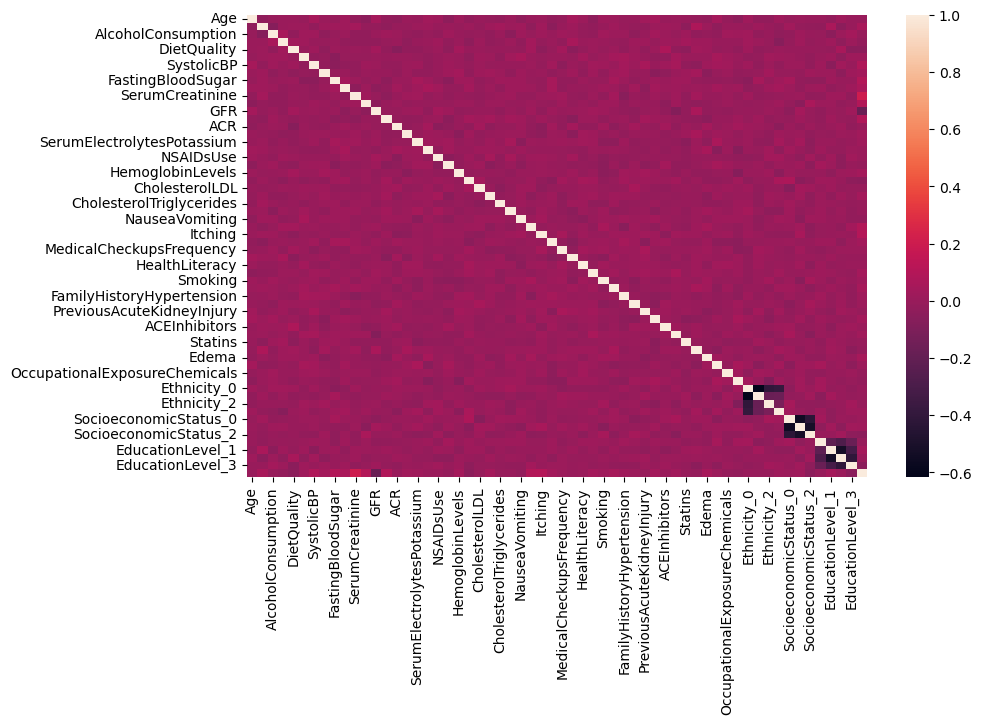

In [11]:
# Visualize correlations with heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corrs)
plt.show()

In [12]:
# Step 1: Get the data
X = df.drop(columns=["Diagnosis", "PatientID"])
y = df.Diagnosis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y) # stratify=True maintains target class percentages
print(X_train.shape, X_test.shape)


(1244, 51) (415, 51)


In [13]:
X_train.head()

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryKidneyDisease,FamilyHistoryHypertension,FamilyHistoryDiabetes,PreviousAcuteKidneyInjury,UrinaryTractInfections,SystolicBP,DiastolicBP,FastingBloodSugar,HbA1c,SerumCreatinine,BUNLevels,GFR,ProteinInUrine,ACR,SerumElectrolytesSodium,SerumElectrolytesPotassium,SerumElectrolytesCalcium,SerumElectrolytesPhosphorus,HemoglobinLevels,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,ACEInhibitors,Diuretics,NSAIDsUse,Statins,AntidiabeticMedications,Edema,FatigueLevels,NauseaVomiting,MuscleCramps,Itching,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
619,70,0,0,0,1,25.805330,0,5.967610,0.998863,1.738922,5.385778,0,0,1,0,0,158,113,147.729192,4.050373,1.604264,5.068575,85.024902,1.936128,171.031153,137.410901,4.601464,8.701846,3.906471,12.161787,291.474408,190.239333,58.472388,314.483784,0,0,2.299842,1,0,0,6.072754,0.677270,0.803673,1.663606,2.917176,0,0,0,3.580185,1.596401,6.102466
150,77,0,0,2,2,38.890987,0,19.536685,7.009697,4.420607,9.695103,0,1,0,0,0,109,77,87.630160,4.017604,3.176729,5.676498,22.784187,1.539150,158.805412,138.539241,3.929070,9.885801,2.691568,13.260514,182.501587,109.790840,75.591286,352.252733,1,0,8.012273,0,0,1,1.526492,0.798088,3.327602,0.340393,73.240855,0,0,0,0.116636,7.457704,8.220837
1411,36,0,0,2,2,33.705178,0,16.131253,0.522437,3.370714,7.371851,0,0,0,0,1,162,90,79.544447,7.453785,4.414368,40.937248,21.884919,1.871393,180.035328,143.870257,4.662819,10.141100,3.226070,10.939328,293.560031,64.371852,22.396169,287.471160,0,0,8.302353,1,0,0,5.670442,2.173264,5.594417,7.698731,92.656593,0,0,0,1.223096,6.142945,4.947824
1297,77,1,3,2,2,18.625818,1,2.037813,2.530422,9.046384,5.701618,0,0,1,0,0,135,67,96.552121,8.696962,0.906937,36.232803,39.377768,1.778000,189.116990,139.542178,3.542243,8.895094,3.725973,13.067000,283.180469,177.063473,89.570661,231.880351,1,0,7.625581,0,0,0,6.133206,4.980933,5.756094,2.503156,19.729789,0,0,1,1.182617,0.809559,6.419864
528,38,0,0,1,2,28.524656,0,15.722013,3.748306,6.349537,9.574425,0,0,0,1,0,174,85,136.294086,8.381971,4.506943,6.586836,48.535161,4.819363,189.657834,139.237083,4.911561,9.894556,3.213538,17.750359,259.451457,162.557143,95.815179,193.350053,1,1,1.050123,0,1,0,4.803629,6.400092,5.819687,8.294074,32.679359,0,0,1,1.653398,2.807983,8.581915


In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42, train_size=0.80)

before = Counter(y)
after = Counter(y_resampled)

In [15]:
print(f"""
-------------------------------
Before SMOTE:
    {before}

After SMOTE:
    {after}
-------------------------------
""")


-------------------------------
Before SMOTE:
    Counter({1: 1524, 0: 135})

After SMOTE:
    Counter({1: 1524, 0: 1524})
-------------------------------



In [16]:
# Function for Classification
# THE ROC CURVE CODE WILL BREAK FOR MULTI_CLASS PROBLEMS
def doClassification(model, X_train, X_test, y_train, y_test):
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.2f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

TRAIN METRICS
    Confusion Matrix: 
    [[1123  104]
 [ 115 1096]]
    
    AUC: 0.9662385750829297

    Classification Report:
                  precision    recall  f1-score   support

           0       0.91      0.92      0.91      1227
           1       0.91      0.91      0.91      1211

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

    
TEST METRICS
    Confusion Matrix: 
    [[267  30]
 [ 33 280]]
    
    AUC: 0.9572724045567497

    Classification Report:
                  precision    recall  f1-score   support

           0       0.89      0.90      0.89       297
           1       0.90      0.89      0.90       313

    accuracy                           0.90       610
   macro avg       0.90      0.90      0.90       610
weighted avg       0.90      0.90      0.90       610

    


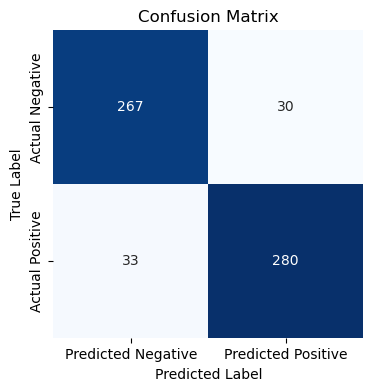

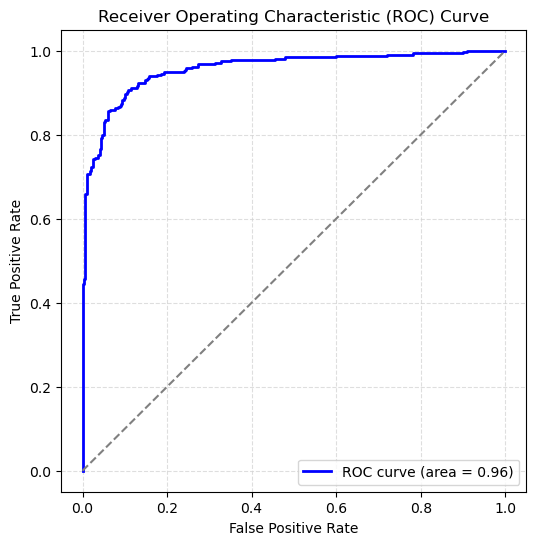

In [17]:
# Step 2: Init the Model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Do Machine Learning
doClassification(lr, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[267  30]
 [ 54 259]]
    
    AUC: 0.8632329686642786

    Classification Report:
                  precision    recall  f1-score   support

           0       0.83      0.90      0.86       297
           1       0.90      0.83      0.86       313

    accuracy                           0.86       610
   macro avg       0.86      0.86      0.86       610
weighted avg       0.86      0.86      0.86       610

    


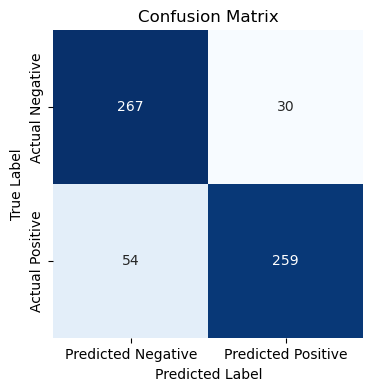

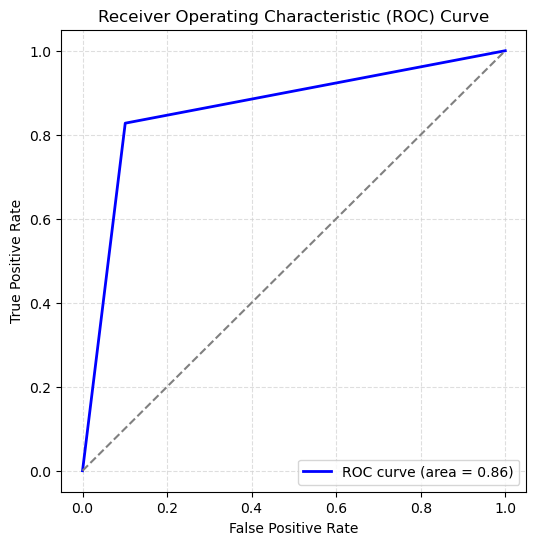

In [18]:
# Step 2: Init the Model
dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Do Machine Learning
doClassification(dt, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[288   9]
 [ 14 299]]
    
    AUC: 0.9934434870537107

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.97      0.96      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610

    


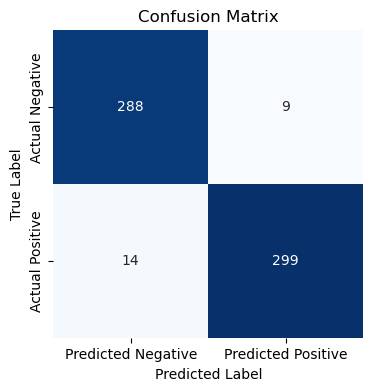

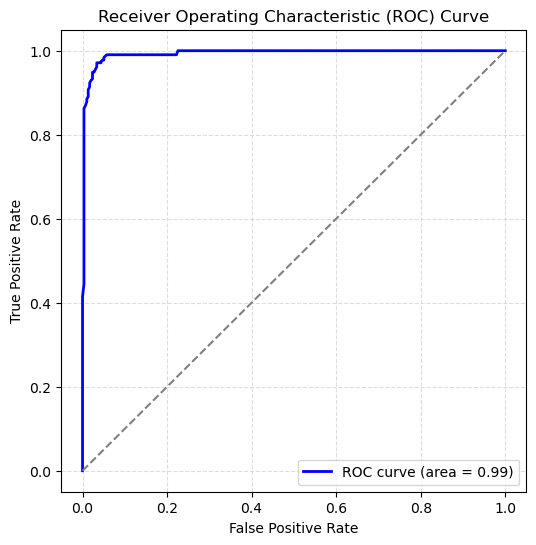

In [19]:
# Step 2: Init the Model
rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Do Machine Learning
doClassification(rf, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[295   2]
 [  1 312]]
    
    AUC: 0.9989888232699735

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       0.99      1.00      1.00       313

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610

    


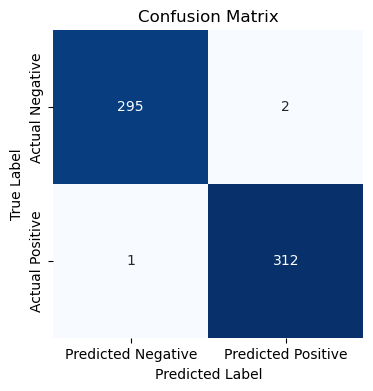

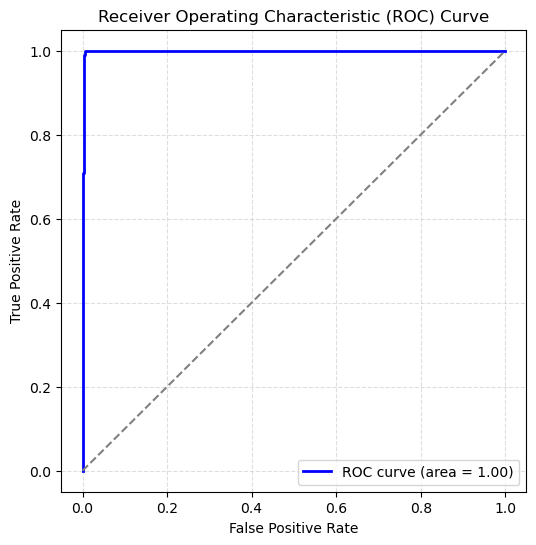

In [20]:
# Step 2: Init the Model
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='rbf', random_state=42, gamma=.1))
])

# Do Machine Learning
doClassification(svc, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [1033  178]]
    
    AUC: 0.990242257706961

    Classification Report:
                  precision    recall  f1-score   support

           0       0.54      1.00      0.70      1227
           1       1.00      0.15      0.26      1211

    accuracy                           0.58      2438
   macro avg       0.77      0.57      0.48      2438
weighted avg       0.77      0.58      0.48      2438

    
TEST METRICS
    Confusion Matrix: 
    [[297   0]
 [278  35]]
    
    AUC: 0.9251191359817558

    Classification Report:
                  precision    recall  f1-score   support

           0       0.52      1.00      0.68       297
           1       1.00      0.11      0.20       313

    accuracy                           0.54       610
   macro avg       0.76      0.56      0.44       610
weighted avg       0.76      0.54      0.43       610

    


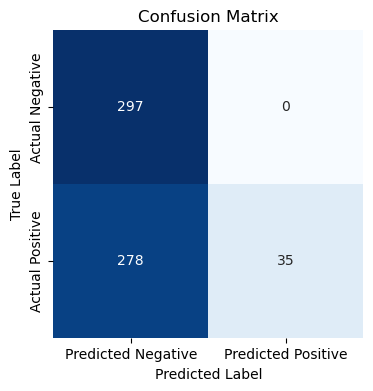

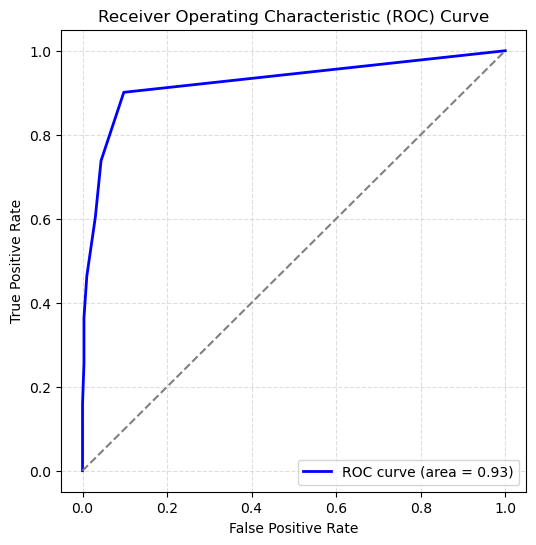

In [21]:
# Step 2: Init the Model
knn = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=15))
])

# Do Machine Learning
doClassification(knn, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[281  16]
 [ 12 301]]
    
    AUC: 0.9866449371241703

    Classification Report:
                  precision    recall  f1-score   support

           0       0.96      0.95      0.95       297
           1       0.95      0.96      0.96       313

    accuracy                           0.95       610
   macro avg       0.95      0.95      0.95       610
weighted avg       0.95      0.95      0.95       610

    


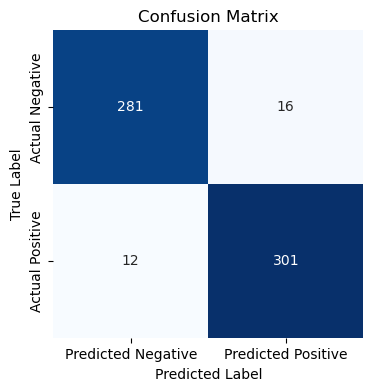

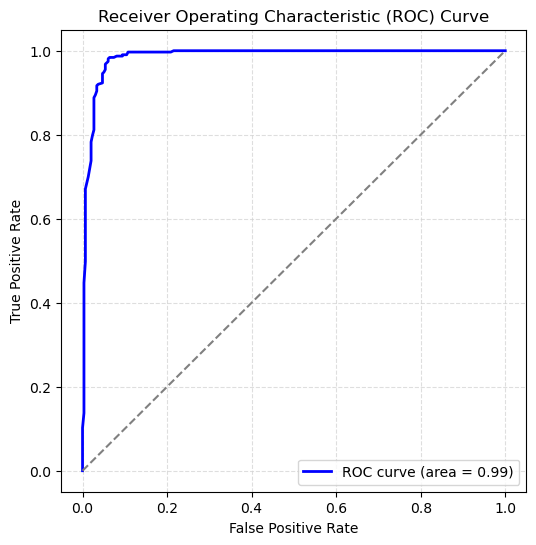

In [22]:
# Step 2: Init the Model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Do Machine Learning
doClassification(et, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1156   71]
 [  77 1134]]
    
    AUC: 0.9848724373223716

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.94      0.94      1227
           1       0.94      0.94      0.94      1211

    accuracy                           0.94      2438
   macro avg       0.94      0.94      0.94      2438
weighted avg       0.94      0.94      0.94      2438

    
TEST METRICS
    Confusion Matrix: 
    [[270  27]
 [ 28 285]]
    
    AUC: 0.9617689138455912

    Classification Report:
                  precision    recall  f1-score   support

           0       0.91      0.91      0.91       297
           1       0.91      0.91      0.91       313

    accuracy                           0.91       610
   macro avg       0.91      0.91      0.91       610
weighted avg       0.91      0.91      0.91       610

    


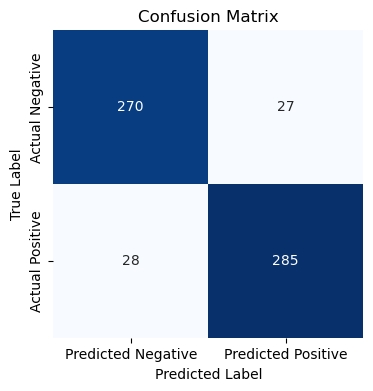

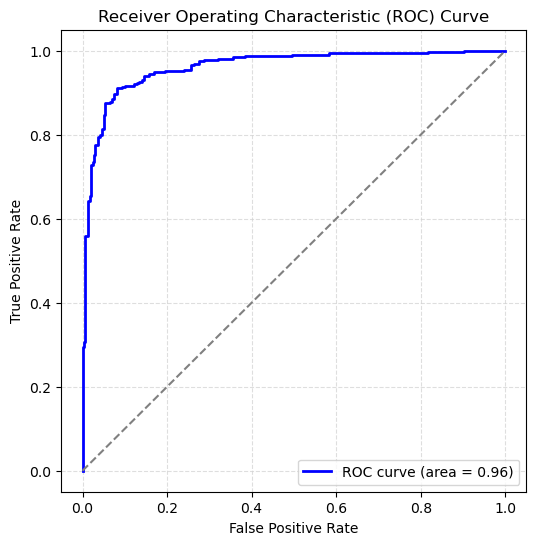

In [23]:
# Step 2: Init the Model
ada = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Do Machine Learning
doClassification(ada, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1217   10]
 [  12 1199]]
    
    AUC: 0.9994346849075004

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      0.99      0.99      1227
           1       0.99      0.99      0.99      1211

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

    
TEST METRICS
    Confusion Matrix: 
    [[284  13]
 [ 26 287]]
    
    AUC: 0.9822398640290014

    Classification Report:
                  precision    recall  f1-score   support

           0       0.92      0.96      0.94       297
           1       0.96      0.92      0.94       313

    accuracy                           0.94       610
   macro avg       0.94      0.94      0.94       610
weighted avg       0.94      0.94      0.94       610

    


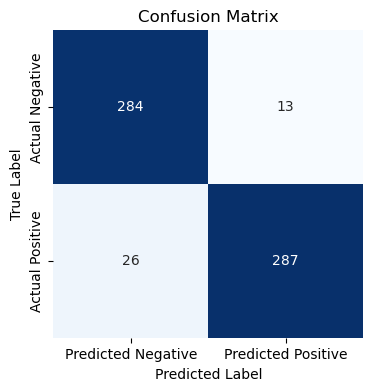

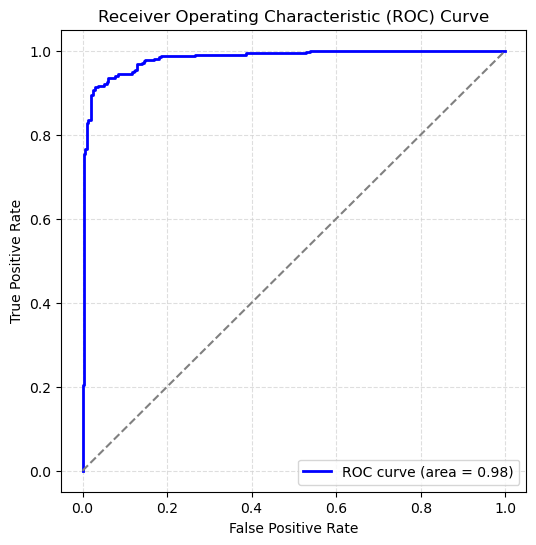

In [24]:
# Step 2: Init the Model
gb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(random_state=42))
])

# Do Machine Learning
doClassification(gb, X_train, X_test, y_train, y_test)

In [25]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[291   6]
 [ 19 294]]
    
    AUC: 0.9914049977947741

    Classification Report:
                  precision    recall  f1-score   support

           0       0.94      0.98      0.96       297
           1       0.98      0.94      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610

    


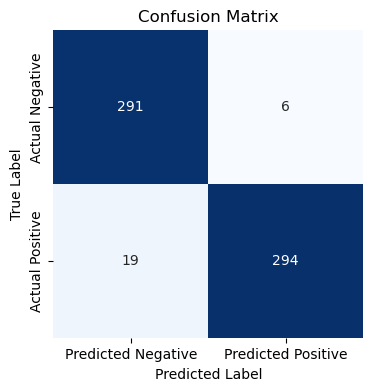

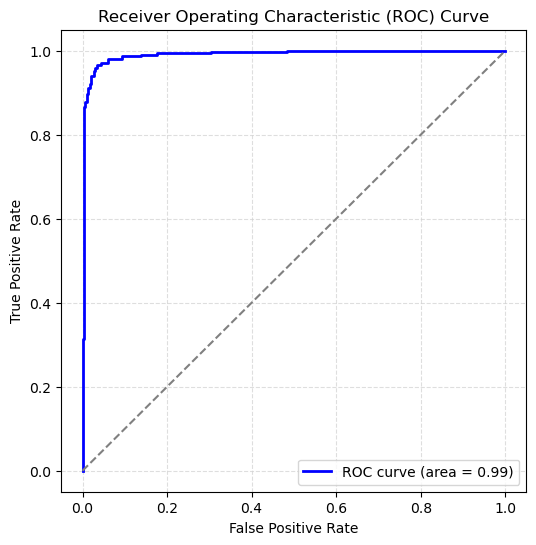

In [26]:
# Step 2: Init the Model
xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

# Do Machine Learning
doClassification(xgb, X_train, X_test, y_train, y_test)

TRAIN METRICS
    Confusion Matrix: 
    [[1227    0]
 [   0 1211]]
    
    AUC: 1.0

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00      1227
           1       1.00      1.00      1.00      1211

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

    
TEST METRICS
    Confusion Matrix: 
    [[288   9]
 [ 14 299]]
    
    AUC: 0.9929325200890696

    Classification Report:
                  precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.97      0.96      0.96       313

    accuracy                           0.96       610
   macro avg       0.96      0.96      0.96       610
weighted avg       0.96      0.96      0.96       610

    


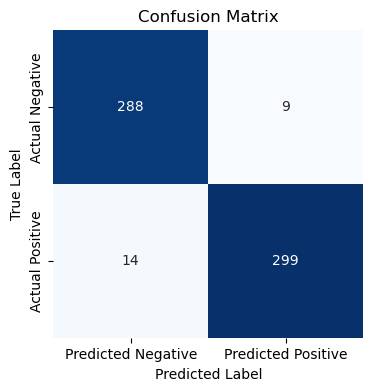

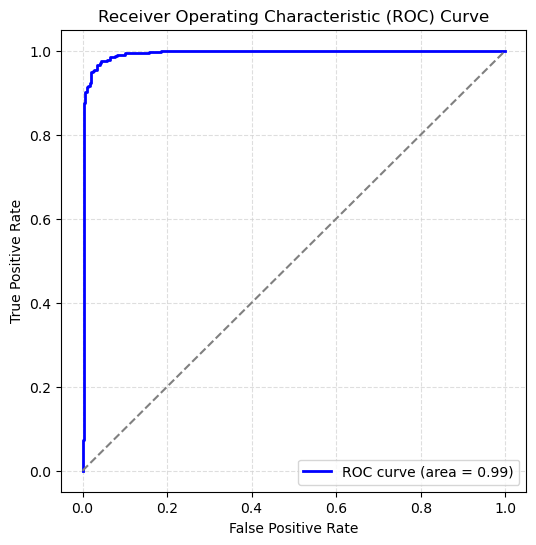

In [27]:
# Step 2: Init the Model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1, n_estimators=225))
])

# Do Machine Learning
doClassification(lgbm, X_train, X_test, y_train, y_test)

In [28]:
# Check feature importances of some of the better models.

In [29]:
fi = pd.DataFrame(list(zip(X.columns, gb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
12,FamilyHistoryHypertension,0.170549
10,SleepQuality,0.140351
33,CholesterolTriglycerides,0.056126
44,QualityOfLifeScore,0.046994
41,NauseaVomiting,0.042375
34,ACEInhibitors,0.040060
28,SerumElectrolytesPhosphorus,0.038633
37,Statins,0.035996
8,PhysicalActivity,0.034101
36,NSAIDsUse,0.032633


In [30]:
fi = pd.DataFrame(list(zip(X.columns, xgb.named_steps['classifier'].feature_importances_)), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
35,Diuretics,0.084148
41,NauseaVomiting,0.066714
33,CholesterolTriglycerides,0.062455
44,QualityOfLifeScore,0.061873
34,ACEInhibitors,0.056314
39,Edema,0.054803
37,Statins,0.054069
12,FamilyHistoryHypertension,0.048416
42,MuscleCramps,0.041400
36,NSAIDsUse,0.041184


In [31]:
fi = pd.DataFrame(list(zip(X.columns, lgbm.named_steps['classifier'].feature_importances_ / sum(lgbm.named_steps['classifier'].feature_importances_))), columns=["Feature", "Importance"])
fi.sort_values(by="Importance", ascending=False)

,Feature,Importance
10,SleepQuality,0.049630
12,FamilyHistoryHypertension,0.048593
28,SerumElectrolytesPhosphorus,0.039407
27,SerumElectrolytesCalcium,0.038667
11,FamilyHistoryKidneyDisease,0.038074
13,FamilyHistoryDiabetes,0.034815
6,Smoking,0.030519
15,UrinaryTractInfections,0.029778
8,PhysicalActivity,0.029630
1,Gender,0.028593


In [32]:
# Cross-validate AUC Scores

In [33]:
# Create a pipeline with a scaler and a logistic regression model
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='rbf', random_state=42, gamma=.1))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(svc, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.9033394  0.8579235  0.91171828 0.71523983 0.63693957]
Mean AUC: 0.805


In [34]:
# Create a pipeline with a scaler and a logistic regression model
lgbm = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LGBMClassifier(random_state=42, verbose=-1, n_estimators=225))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lgbm, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.96539162 0.923983   0.91827565 0.67176685 0.61427875]
Mean AUC: 0.819


In [35]:
# Create a pipeline with a scaler and a logistic regression model
et = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ExtraTreesClassifier(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(ada, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.82003643 0.81675774 0.82003643 0.62112933 0.59807505]
Mean AUC: 0.735


In [36]:
# Create a pipeline with a scaler and a logistic regression model
lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Perform 5-fold cross-validation with roc_auc scoring
cv = StratifiedKFold(n_splits=5)
cv_scores = cross_val_score(lr, X, y, cv=cv, scoring='roc_auc')

# Output the results
print(f"Cross-validation AUC scores: {cv_scores}")
print(f"Mean AUC: {np.mean(cv_scores):.3f}")

Cross-validation AUC scores: [0.88330298 0.89532483 0.91183971 0.74778385 0.65119396]
Mean AUC: 0.818


In [37]:
# SVC seems to have the fewest false negatives while maintaining high accuracy
# Seeing as this is medical data this is priority.
# 

In [38]:
# Retrain the model on the ENTIRE dataset
svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, kernel='rbf', random_state=42, gamma=.1))
])
svc.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI',
                                                   'AlcoholConsumption',
                                                   'PhysicalActivity',
                                                   'DietQuality',
                                                   'SleepQuality', 'SystolicBP',
                                                   'DiastolicBP',
                                                   'FastingBloodSugar', 'HbA1c',
                                                   'SerumCreatinine',
                                                   'BUNLevels', 'GFR',
                                                   'ProteinInUrine...
                                                   'AntidiabeticMedications',
                                                   'Edema',
                                                   'HeavyMetalsExposure',
                                                   'OccupationalExposureChemicals',
                                                   'WaterQuality']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(missing_values=<NA>,
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Ethnicity',
                                                   'SocioeconomicStatus',
                                                   'EducationLevel'])])),
                ('classifier',
                 SVC(gamma=0.1, probability=True, random_state=42))])

In [39]:
# Save off my models
import pickle

# Model
pickle.dump(svc, open("app/Chronic_Kidney_Dsease_Model_Pipeline.h5", 'wb'))